In [ ]:
!gdown --id 14gf8bcym_lTcvjZQmg8kwq3aXkENBxMQ

In [3]:
import zipfile
import os 

zip_file_path = 'tsukuba.zip'

extract_to = 'tsukuba'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Giải nén thành công!")

Giải nén thành công!


### **Cài đặt thuật toán**

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [1]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y)**2

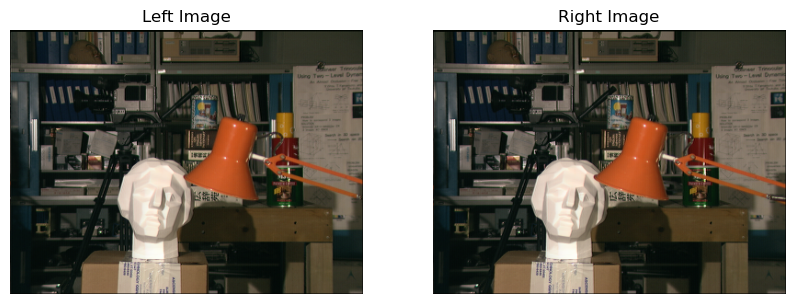

In [3]:
# left_img_path = 'tsukuba/left.png'
# right_img_path = 'tsukuba/right.png'
# disparity_range = 16 
# left = cv2.imread(left_img_path)
# right = cv2.imread(right_img_path)
# left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
# right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(left)
# plt.axis('off')
# plt.title('Left Image')
# plt.subplot(1, 2, 2)
# plt.imshow(right)
# plt.axis('off')
# plt.title('Right Image')
# plt.show()
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'
disparity_range = 16 

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left)
plt.axis('off')
plt.title("Left Image")

plt.subplot(1, 2, 2)
plt.imshow(right)
plt.axis('off')
plt.title("Right Image")
plt.show()

In [19]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)
    left = left.astype(np.float32)
    right = right.astype(np.float32)
    height, width = left.shape[:2]

    depth = np.zeros((height, width), np.uint8)
    max_value = 255
    scale = 16 

    for y in range(height):
        for x in range(width):
            disparity = 0
            cost_min = max_value 
            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                else l1_distance(int(left[y, x]), int(right[y, x - j]))
            
                if cost < cost_min: 
                    cost_min = cost 
                    disparity = j 
            depth[y, x] = disparity * scale
    if save_result == True:
        print('Saving result...')
        cv2.imwrite(f"pixel_wise_l1.png", depth)
        cv2.imwrite(f"pixel_wise_l1_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')
    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET) 


Saving result...
Done.


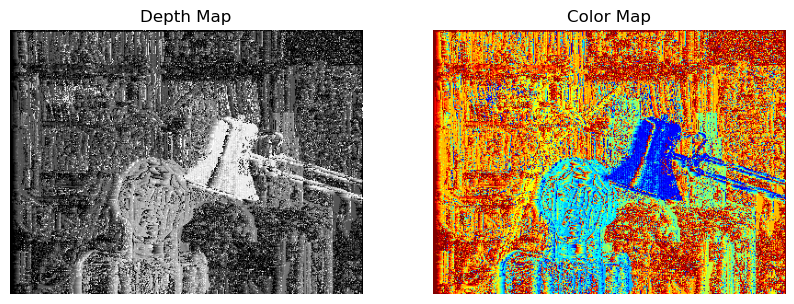

In [22]:
depth, color = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(depth, cmap='gray')
plt.axis('off')
plt.title('Depth Map')

plt.subplot(1, 2, 2)
plt.imshow(color)
plt.axis('off')
plt.title('Color Map')
plt.show()

In [32]:
def pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range, save_result=True):
    left = cv2.imread(left_img_path, 0)
    right = cv2.imread(right_img_path, 0)
    left = left.astype(np.float32)
    right = right.astype(np.float32)
    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)
    max_value = 255 ** 2 
    scale = 16

    for y in range(height):
        for x in range(width):
            disparity = 0 
            cost_min = max_value
            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost 
                    disparity = j 
            depth[y, x] = disparity * scale 
    if save_result == True:
        print('Saving result...')
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))
    print('Done.')
    return depth



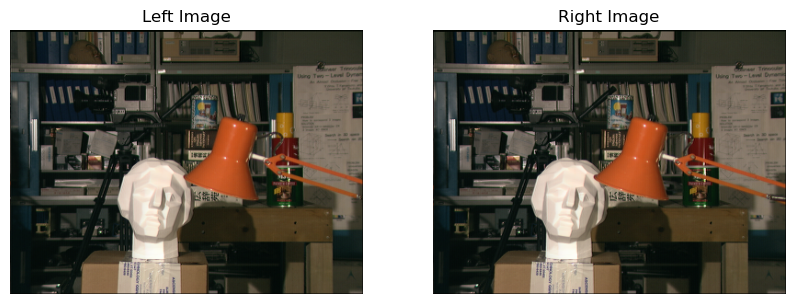

In [33]:
import cv2
import matplotlib.pyplot as plt

left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(left)
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right)
plt.title('Right Image')
plt.axis('off')

plt.show()


Saving result...
Done.


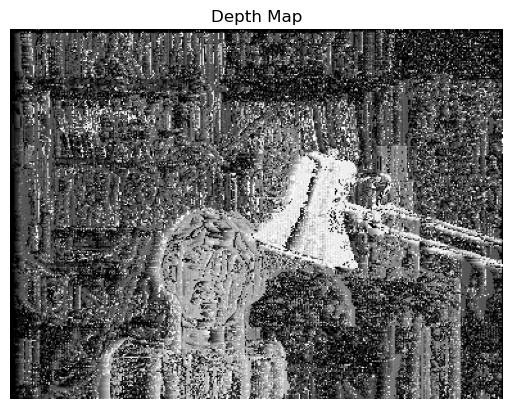

In [34]:
depth = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)
plt.imshow(depth[0], cmap='gray')
plt.title('Depth Map')
plt.axis('off')
plt.show()

Saving result...
Done.


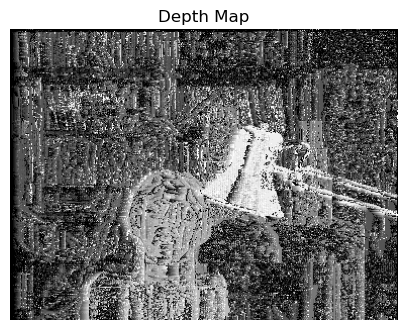

In [35]:
depth = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

plt.figure(figsize=(5, 5))
plt.imshow(depth, cmap='gray')
plt.title('Depth Map')
plt.axis('off')
plt.show()
